# Weekopdracht 6

In [2]:
# Importeren van libraries
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lezen van de dataset
df = pd.read_csv('spotify-2023.csv', encoding='latin-1')
df.head()

,wtrack_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:
# Weergeven welke kolommen in de data zitten
for column_name in df.columns:
    print(column_name)

# Hoeveelheid kolommen
count = len(df.columns)
print(count)

wtrack_name
artist(s)_name
artist_count
released_year
released_month
released_day
in_spotify_playlists
in_spotify_charts
streams
in_apple_playlists
in_apple_charts
in_deezer_playlists
in_deezer_charts
in_shazam_charts
bpm
key
mode
danceability_%
valence_%
energy_%
acousticness_%
instrumentalness_%
liveness_%
speechiness_%
24


In [4]:
# Verwijderen van kolommen met incomplete data
df.drop(columns=['in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'instrumentalness_%'], inplace=True)


In [5]:
# Track name
# Aantal unieke waarden
num_unique = df['wtrack_name'].nunique()
print("Aantal unieke waarden track_name:", num_unique)
print("----------------------------------")

# Artist name
# Aantal unieke artiesten
aantal_unieke_artiesten = df['artist(s)_name'].nunique()

# Meest voorkomende artiest(en)
meest_voorkomende_artiesten = df['artist(s)_name'].mode()
print("Aantal unieke artiesten:", aantal_unieke_artiesten)
print("Meest voorkomende artiest(en):", meest_voorkomende_artiesten)
print("----------------------------------")



Aantal unieke waarden track_name: 943
----------------------------------
Aantal unieke artiesten: 645
Meest voorkomende artiest(en): 0    Taylor Swift
Name: artist(s)_name, dtype: object
----------------------------------


Aantal unieke artiesten: 645
Meest voorkomende artiest(en): 0    Taylor Swift
Name: artist(s)_name, dtype: object
----------------------------------
1.5561385099685205
count    953.000000
mean       1.556139
std        0.893044
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        8.000000
Name: artist_count, dtype: float64


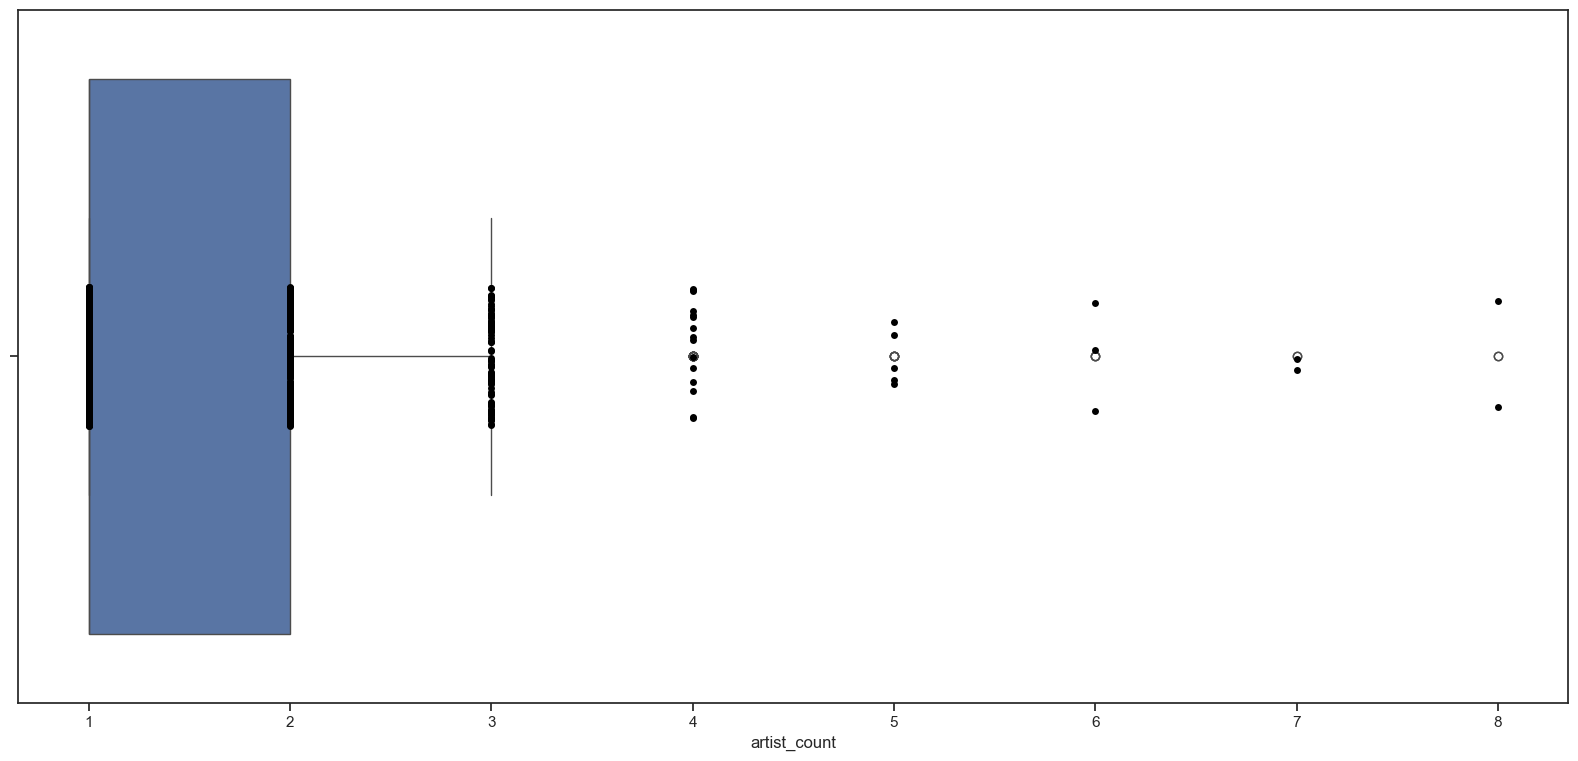

In [31]:
# Artist count
# Meest voorkomende artiest(en)
meest_voorkomende_artiesten = df['artist(s)_name'].mode()
print("Aantal unieke artiesten:", aantal_unieke_artiesten)
print("Meest voorkomende artiest(en):", meest_voorkomende_artiesten)
print("----------------------------------")

print(df['artist_count'].mean())

sns.set(
        style="ticks",                   
        rc={"figure.figsize": (20, 9),     
            "figure.facecolor": "white",  
            "axes.facecolor": "white"})

b = sns.boxplot(data = df, x = df['artist_count'])
b = sns.stripplot(data = df, x = df['artist_count'], 
                      color = "black")
# Show the plot
b.get_figure();

# b.figure.savefig("artist_count", dpi=200)
print(df['artist_count'].describe())

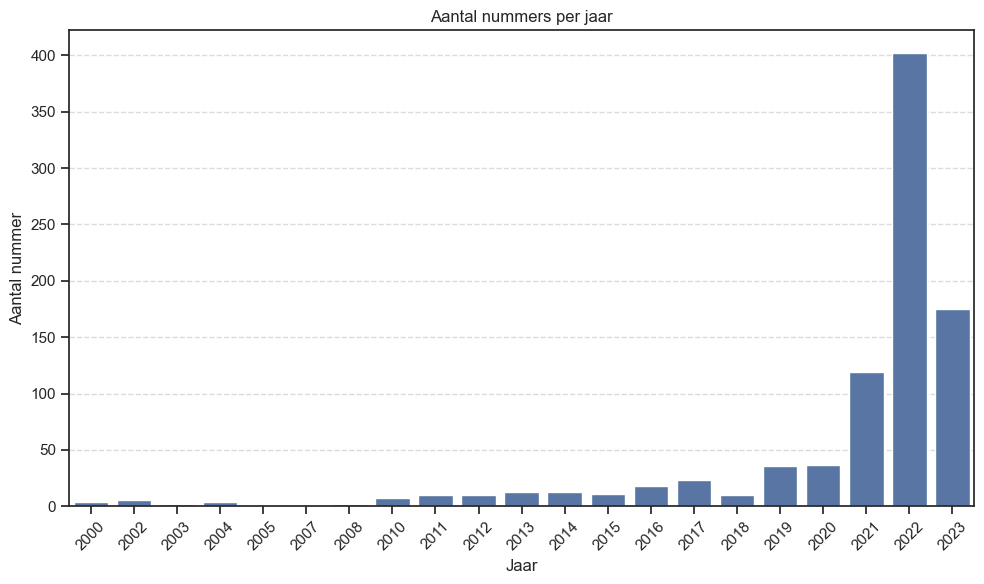

count     953.000000
mean     2018.238195
std        11.116218
min      1930.000000
25%      2020.000000
50%      2022.000000
75%      2022.000000
max      2023.000000
Name: released_year, dtype: float64

In [35]:
# Released year
year_counts = df['released_year'].value_counts().sort_index()
df_filtered = df[df['released_year'] >= 2000]

plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, x='released_year')
plt.title('Aantal nummers per jaar')
plt.xlabel('Jaar')
plt.ylabel('Aantal nummer')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('released_year.png')
plt.show()



# Modus berekenen
mode = df['released_year'].mode()
df['released_year'].describe()


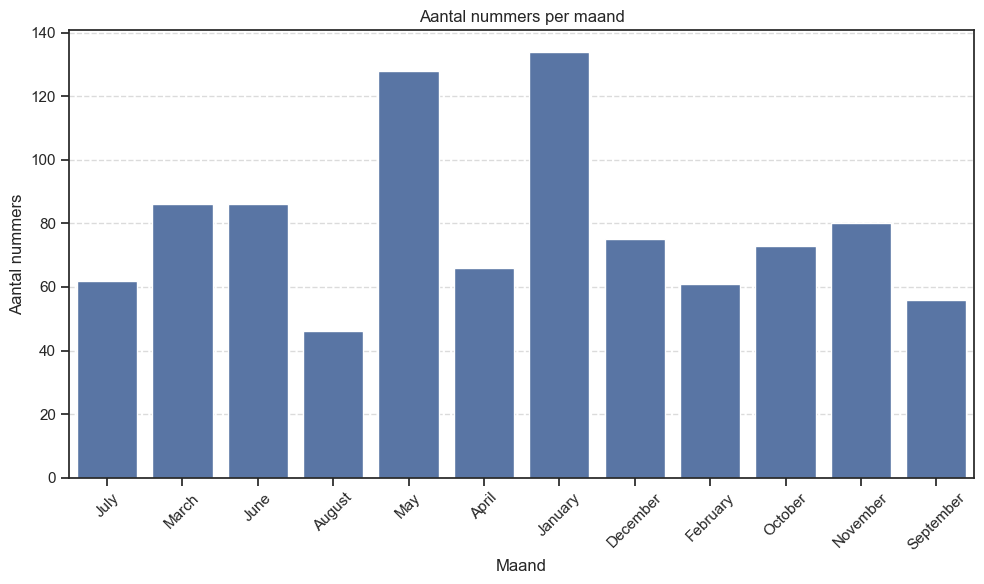

In [44]:
# # Released Month
# def convert_to_month_name(month_num):
#     month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
#     return month_names[month_num - 1]

# # Pas de functie toe op de 'Month' kolom van de DataFrame
# df['released_month'] = df['released_month'].apply(convert_to_month_name)
# month_counts = df['released_month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='released_month')
plt.title('Aantal nummers per maand')
plt.xlabel('Maand')
plt.ylabel('Aantal nummers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('released_month.png')
plt.show()



# Modus berekenen
mode = df['released_month'].mode()


# Print de descriptieve statistieken
# df['released_month'].describe()

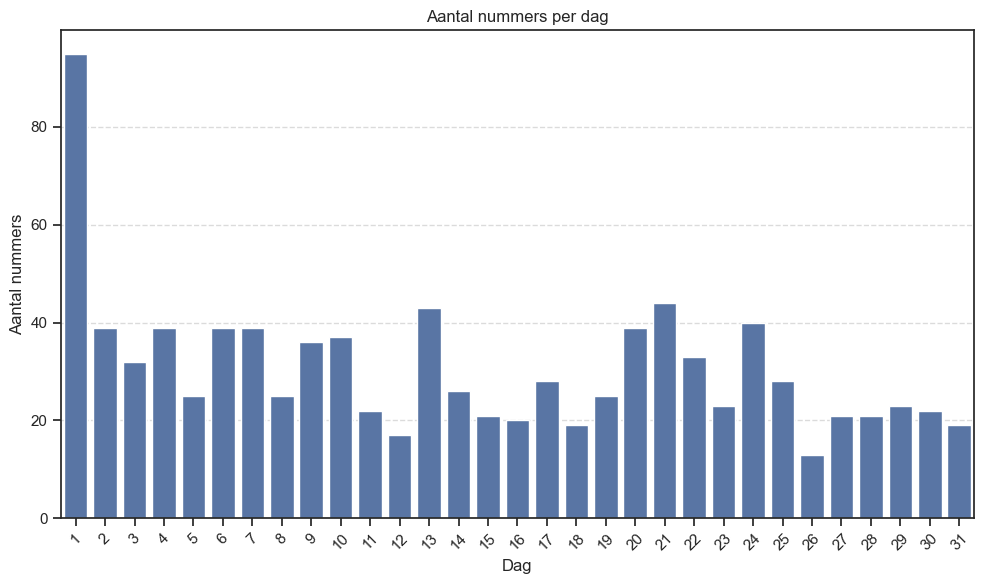

count    953.000000
mean      13.930745
std        9.201949
min        1.000000
25%        6.000000
50%       13.000000
75%       22.000000
max       31.000000
Name: released_day, dtype: float64

In [43]:
day_counts = df['released_day'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='released_day')
plt.title('Aantal nummers per dag')
plt.xlabel('Dag')
plt.ylabel('Aantal nummers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('released_day.png')

plt.show()



# Modus berekenen
mode = df['released_day'].mode()


# Print de descriptieve statistieken
df['released_day'].describe()

5200.124868835257


count      953.000000
mean      5200.124869
std       7897.608990
min         31.000000
25%        875.000000
50%       2224.000000
75%       5542.000000
max      52898.000000
Name: in_spotify_playlists, dtype: float64

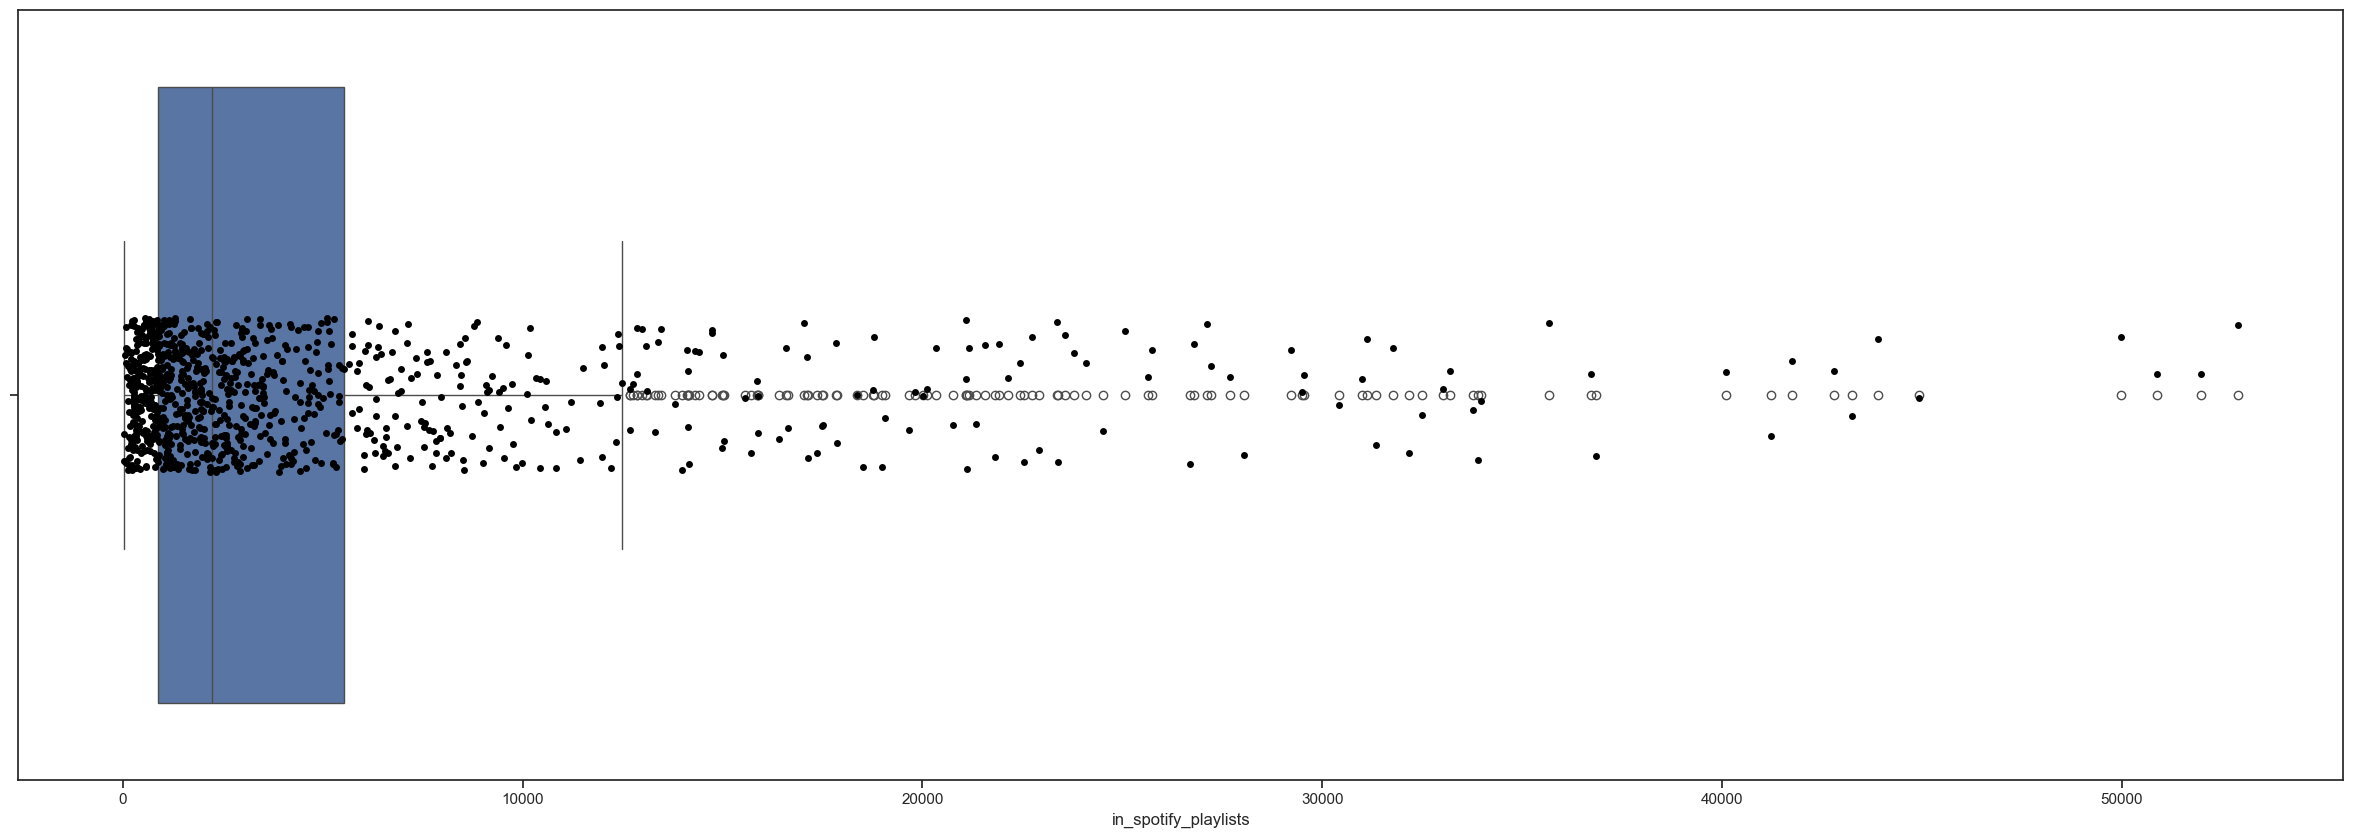

In [17]:
df['in_spotify_playlists'].describe()

# spotify playlists
print(df['in_spotify_playlists'].mean())

sns.set(
        style="ticks",                   # The 'ticks' style
        rc={"figure.figsize": (30, 10),      # width = 6, height = 9
            "figure.facecolor": "white",  # Figure colour
            "axes.facecolor": "white"})

b = sns.boxplot(data = df, x = df['in_spotify_playlists'])
b = sns.stripplot(data = df, x = df['in_spotify_playlists'], 
                      color = "black")
# Show the plot
b.get_figure();

b.figure.savefig("in_spotify_playlists", dpi=200)
df['in_spotify_playlists'].describe()

count    953.000000
mean      12.009444
std       19.575992
min        0.000000
25%        0.000000
50%        3.000000
75%       16.000000
max      147.000000
Name: in_spotify_charts, dtype: float64

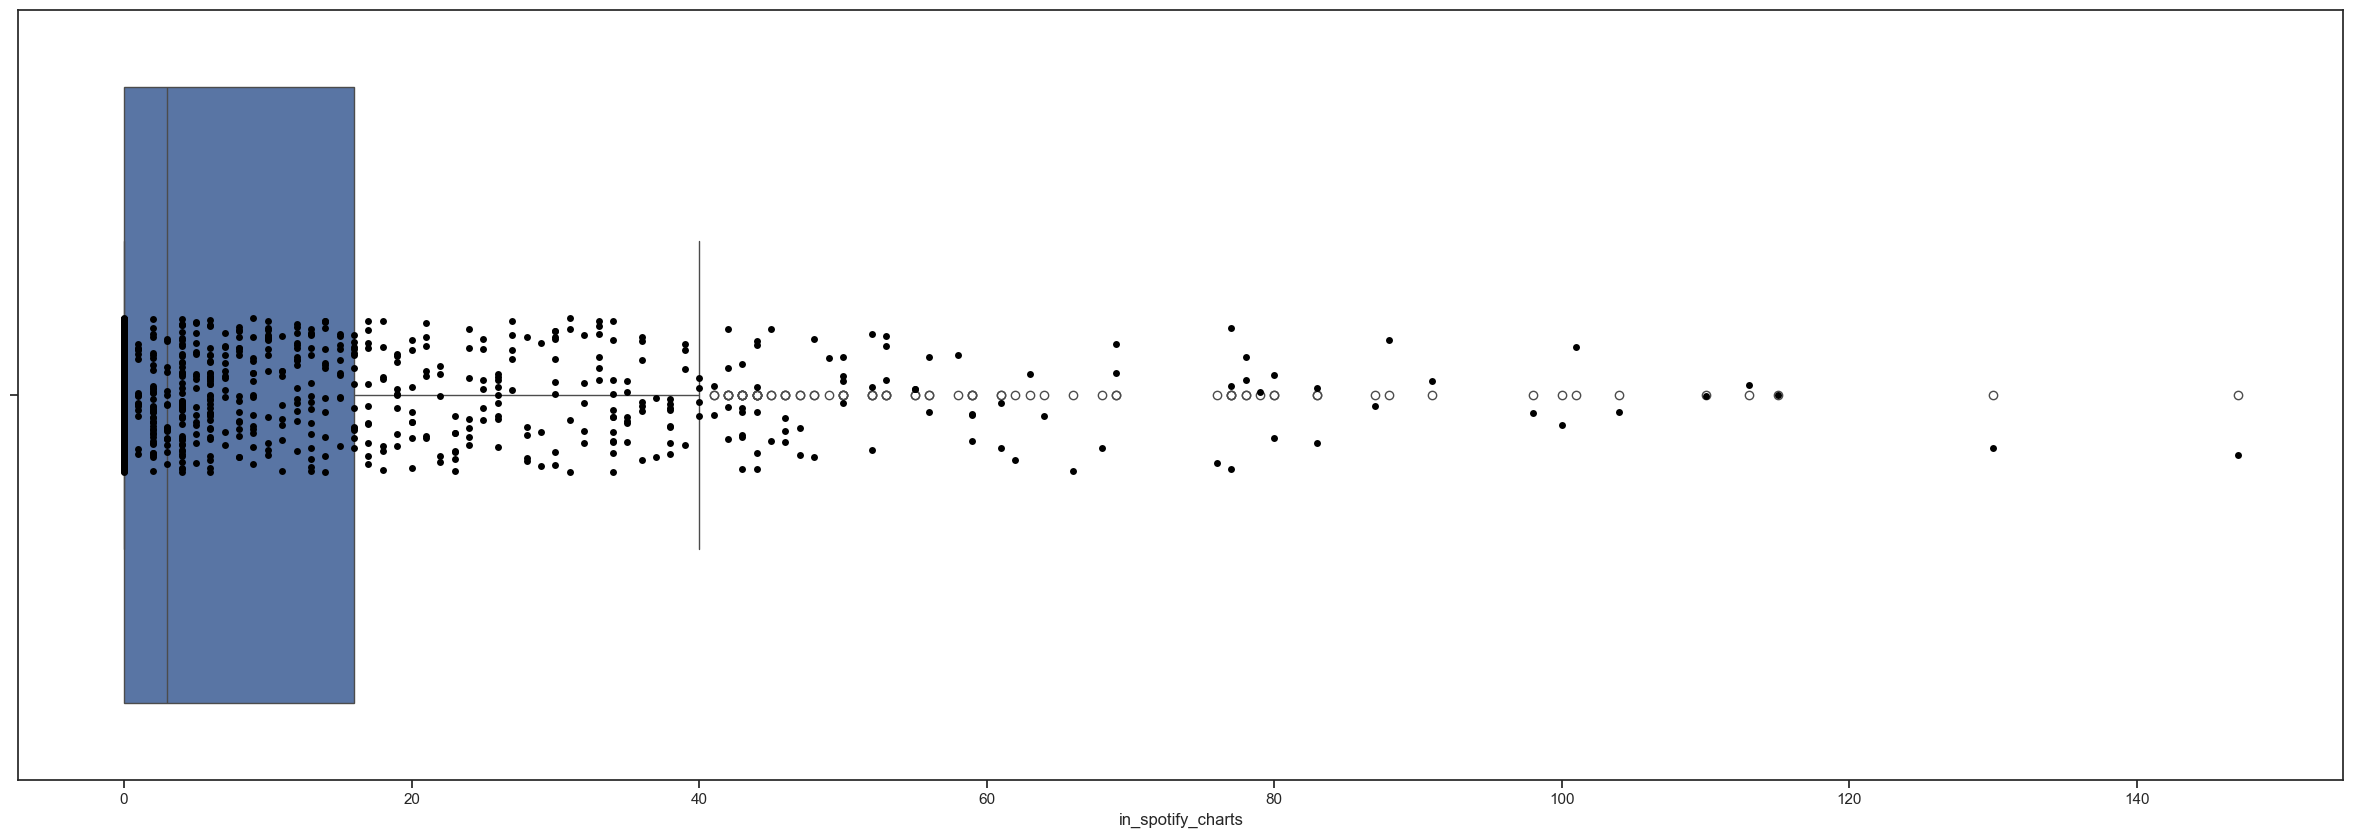

In [32]:
# spotify charts
df['in_spotify_charts'].describe()
sns.set(
        style="ticks",                   # The 'ticks' style
        rc={"figure.figsize": (30, 10),      # width = 6, height = 9
            "figure.facecolor": "white",  # Figure colour
            "axes.facecolor": "white"})

b = sns.boxplot(data = df, x = df['in_spotify_charts'])
b = sns.stripplot(data = df, x = df['in_spotify_charts'], 
                      color = "black")
# Show the plot
b.get_figure();

# b.figure.savefig("in_spotify_charts", dpi=200)
df['in_spotify_charts'].describe()

In [19]:
# streams
count = 9.520000e+02
mean = 5.141374e+08
std = 5.668569e+08
min_value = 2.762000e+03
q1 = 1.416362e+08
median = 2.905309e+08
q3 = 6.738690e+08
max_value = 3.703895e+09

# Function to format numbers with commas for thousands separator
def format_with_commas(number):
    return '{:,.0f}'.format(number)

# Convert numbers from scientific notation to their full form with commas
count_full = format_with_commas(count)
mean_full = format_with_commas(mean)
std_full = format_with_commas(std)
min_full = format_with_commas(min_value)
q1_full = format_with_commas(q1)
median_full = format_with_commas(median)
q3_full = format_with_commas(q3)
max_full = format_with_commas(max_value)

print("Count:", count_full)
print("Mean:", mean_full)
print("Standard Deviation:", std_full)
print("Minimum:", min_full)
print("25th percentile (Q1):", q1_full)
print("Median:", median_full)
print("75th percentile (Q3):", q3_full)
print("Maximum:", max_full)



Count: 952
Mean: 514,137,400
Standard Deviation: 566,856,900
Minimum: 2,762
25th percentile (Q1): 141,636,200
Median: 290,530,900
75th percentile (Q3): 673,869,000
Maximum: 3,703,895,000


67.8121720881427


count    953.000000
mean      67.812172
std       86.441493
min        0.000000
25%       13.000000
50%       34.000000
75%       88.000000
max      672.000000
Name: in_apple_playlists, dtype: float64

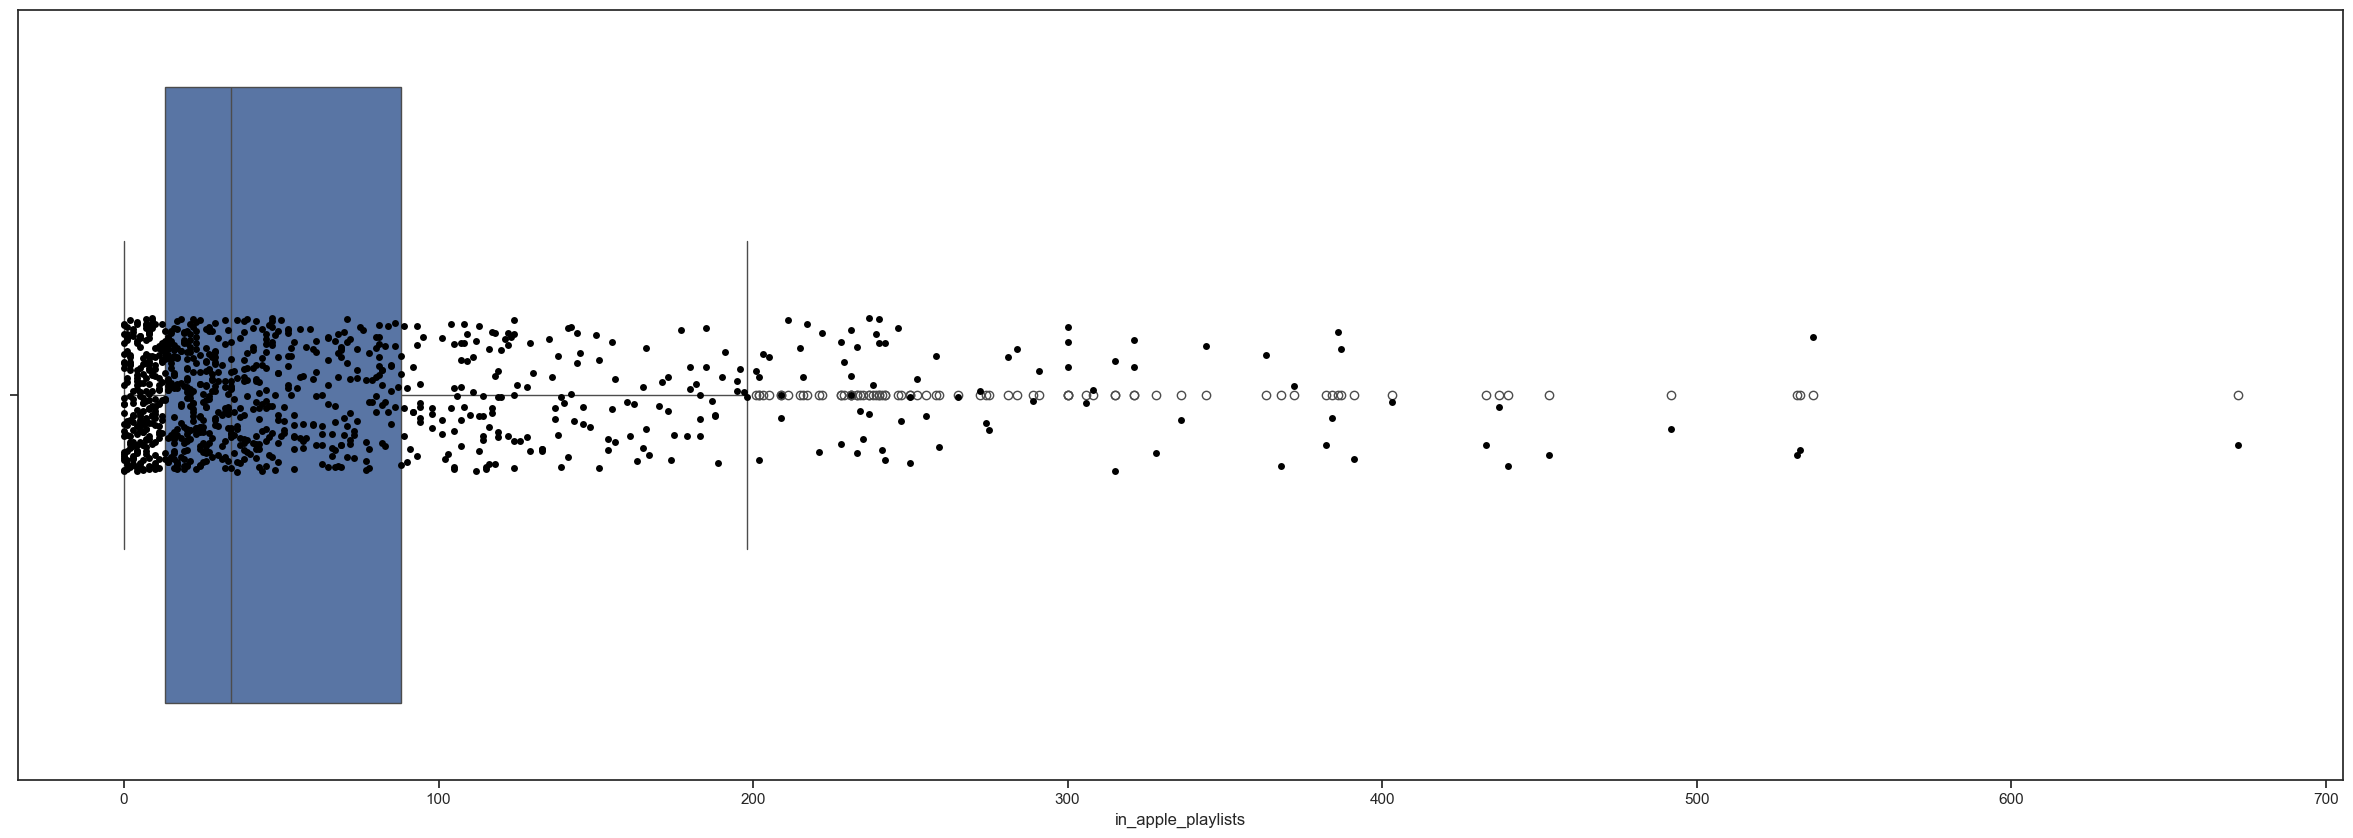

In [20]:
df['in_apple_playlists'].describe()

# apple playlists
print(df['in_apple_playlists'].mean())

sns.set(
        style="ticks",                   # The 'ticks' style
        rc={"figure.figsize": (30, 10),      # width = 6, height = 9
            "figure.facecolor": "white",  # Figure colour
            "axes.facecolor": "white"})

b = sns.boxplot(data = df, x = df['in_apple_playlists'])
b = sns.stripplot(data = df, x = df['in_apple_playlists'], 
                      color = "black")
# Show the plot
b.get_figure();

b.figure.savefig("in_apple_playlists", dpi=200)
df['in_apple_playlists'].describe()

count    953.000000
mean      51.908709
std       50.630241
min        0.000000
25%        7.000000
50%       38.000000
75%       87.000000
max      275.000000
Name: in_apple_charts, dtype: float64

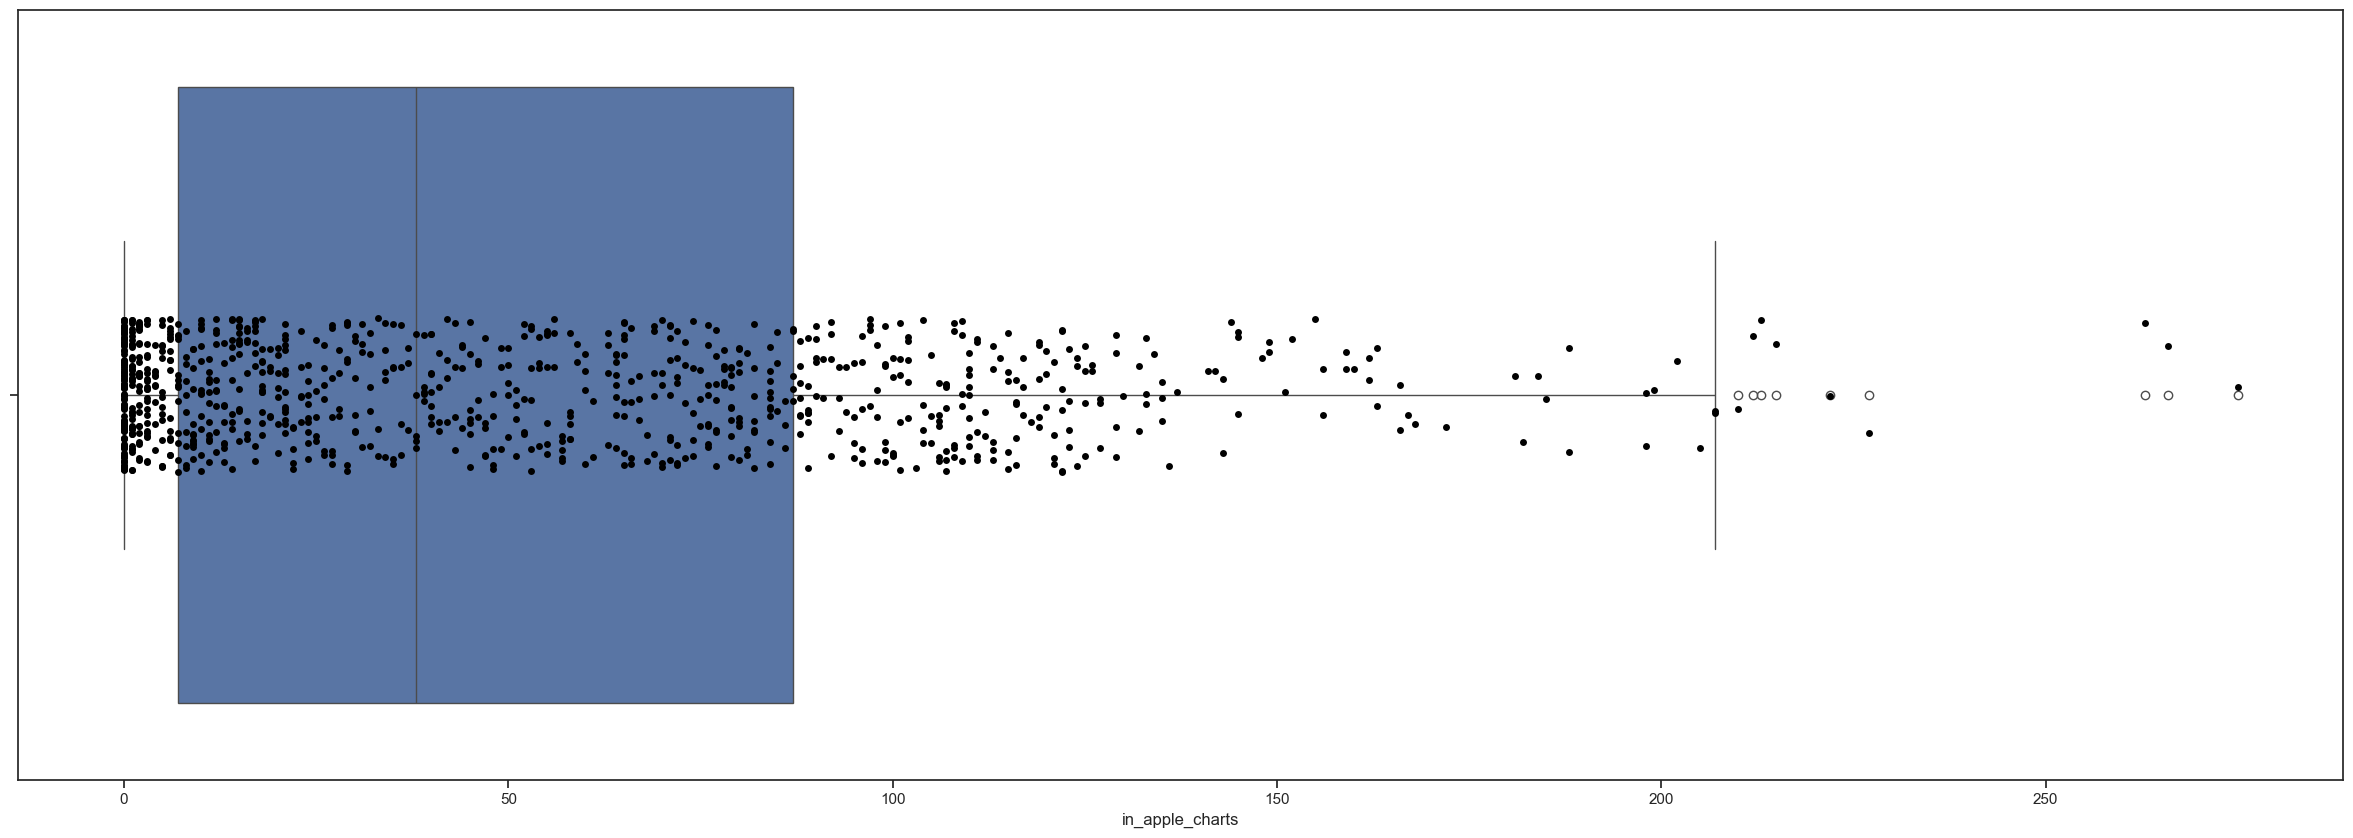

In [21]:
# apple charts
sns.set(
        style="ticks",                   # The 'ticks' style
        rc={"figure.figsize": (30, 10),      # width = 6, height = 9
            "figure.facecolor": "white",  # Figure colour
            "axes.facecolor": "white"})

b = sns.boxplot(data = df, x = df['in_apple_charts'])
b = sns.stripplot(data = df, x = df['in_apple_charts'], 
                      color = "black")
# Show the plot
b.get_figure();

b.figure.savefig("in_apple_charts", dpi=200)
df['in_apple_charts'].describe()

count    953.000000
mean     122.540399
std       28.057802
min       65.000000
25%      100.000000
50%      121.000000
75%      140.000000
max      206.000000
Name: bpm, dtype: float64

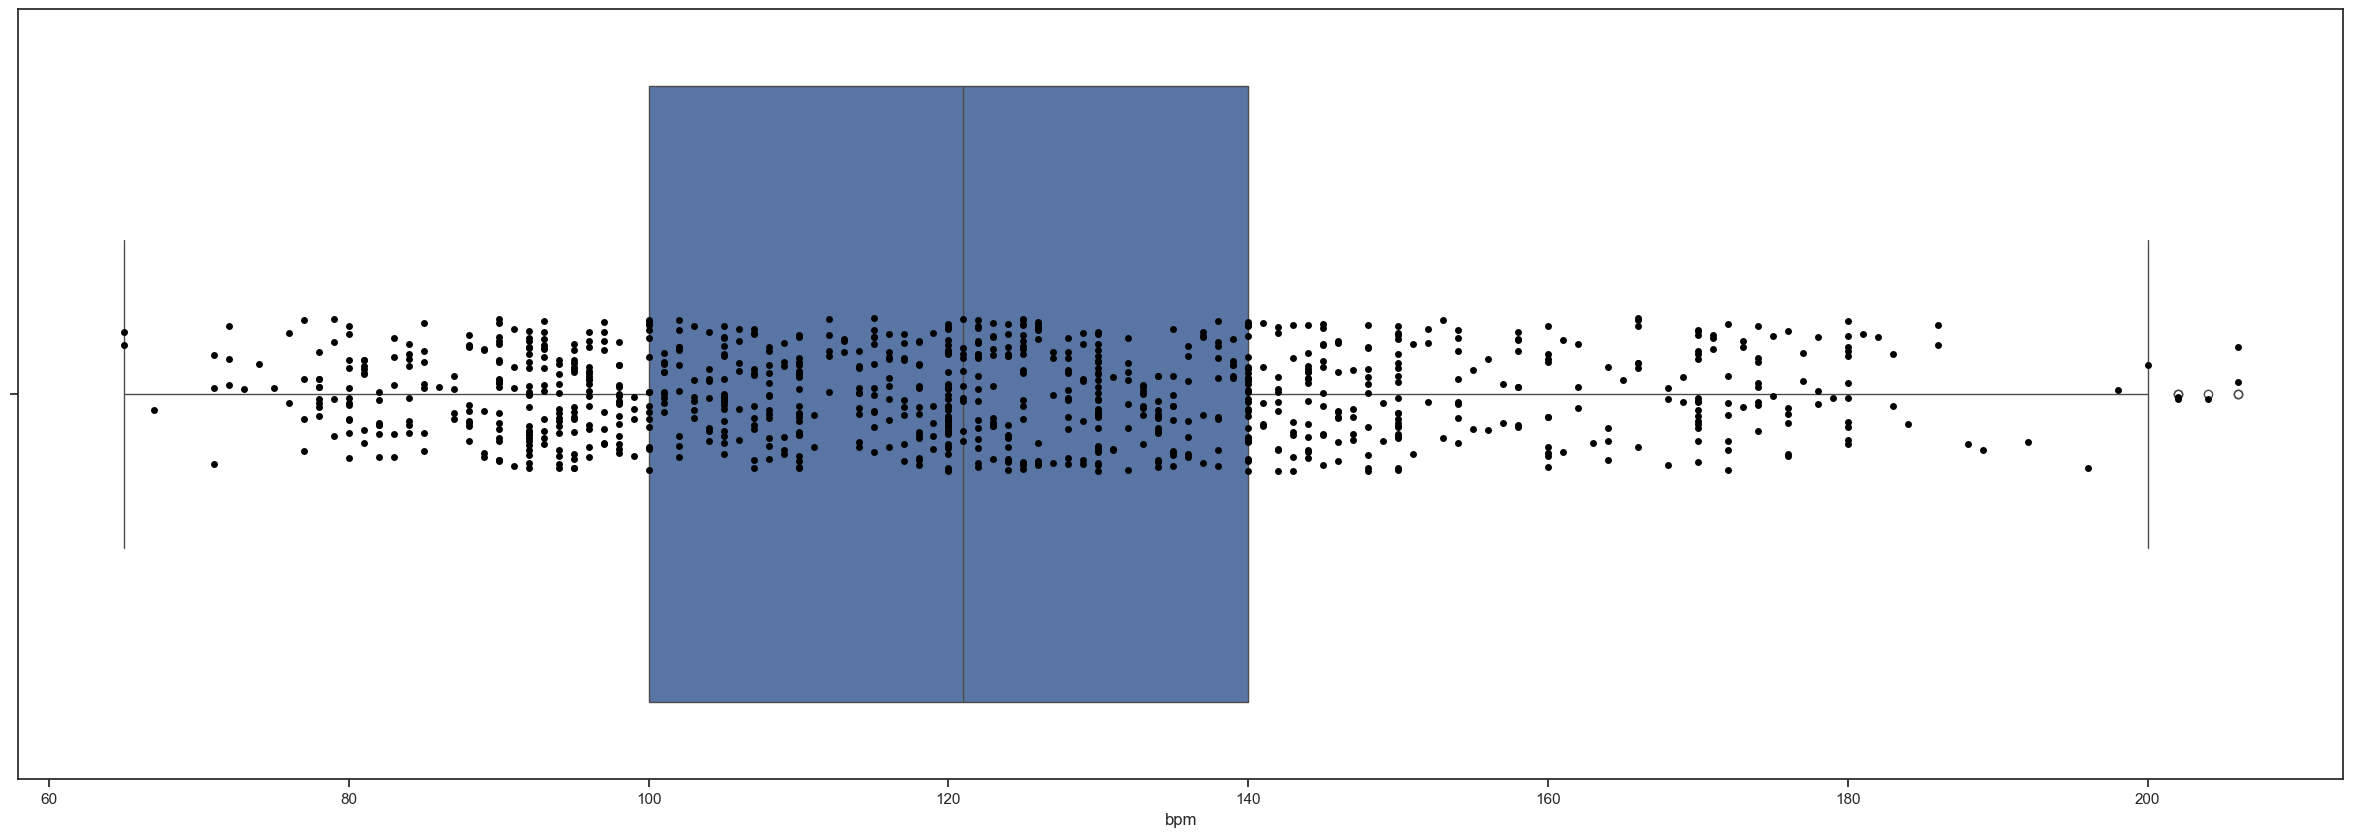

In [22]:
# BPM
sns.set(
        style="ticks",                   # The 'ticks' style
        rc={"figure.figsize": (30, 10),      # width = 6, height = 9
            "figure.facecolor": "white",  # Figure colour
            "axes.facecolor": "white"})

b = sns.boxplot(data = df, x = df['bpm'])
b = sns.stripplot(data = df, x = df['bpm'], 
                      color = "black")
# Show the plot
b.get_figure();

b.figure.savefig("bpm", dpi=200)
df['bpm'].describe()

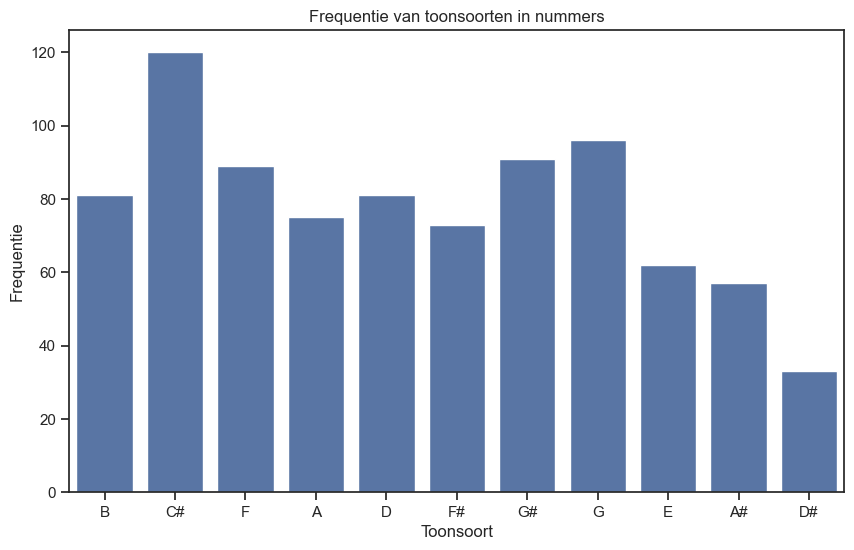

count     858
unique     11
top        C#
freq      120
Name: key, dtype: object

In [48]:
# Key
sns.set(
        style="ticks",                   
        rc={"figure.figsize": (30, 10),
            "figure.facecolor": "white",  
            "axes.facecolor": "white"})

plt.figure(figsize=(10, 6))  
sns.countplot(data=df, x='key') 
plt.title('Frequentie van toonsoorten in nummers')
plt.xlabel('Toonsoort')
plt.ylabel('Frequentie')
plt.savefig('key')

plt.show()


# b.figure.savefig("key", dpi=200)
df['key'].describe()

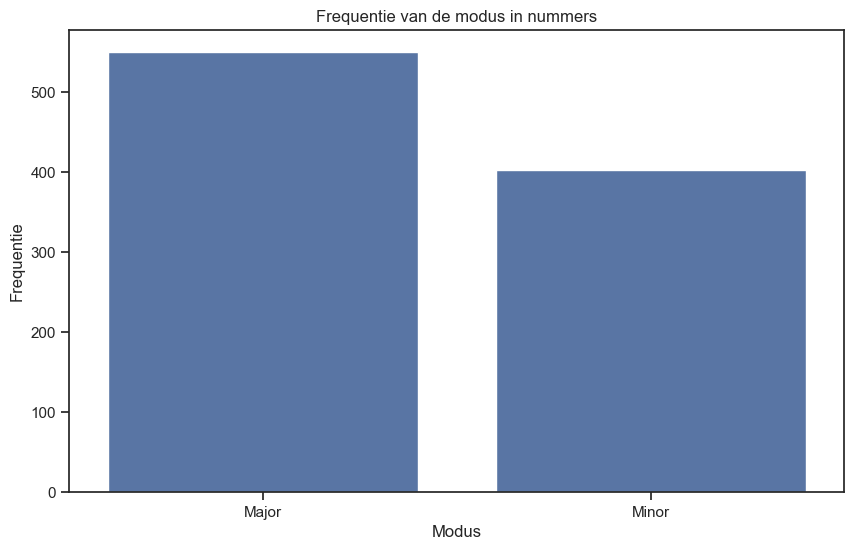

count       953
unique        2
top       Major
freq        550
Name: mode, dtype: object

In [49]:
# mode
sns.set(
        style="ticks",                   # The 'ticks' style
        rc={"figure.figsize": (30, 10),      # width = 6, height = 9
            "figure.facecolor": "white",  # Figure colour
            "axes.facecolor": "white"})

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='mode')  
plt.title('Frequentie van de modus in nummers')
plt.xlabel('Modus')
plt.ylabel('Frequentie')
plt.savefig('mode')
plt.show()


df['mode'].describe()

mode:  0    70
Name: danceability_%, dtype: int64


count    953.00000
mean      66.96957
std       14.63061
min       23.00000
25%       57.00000
50%       69.00000
75%       78.00000
max       96.00000
Name: danceability_%, dtype: float64

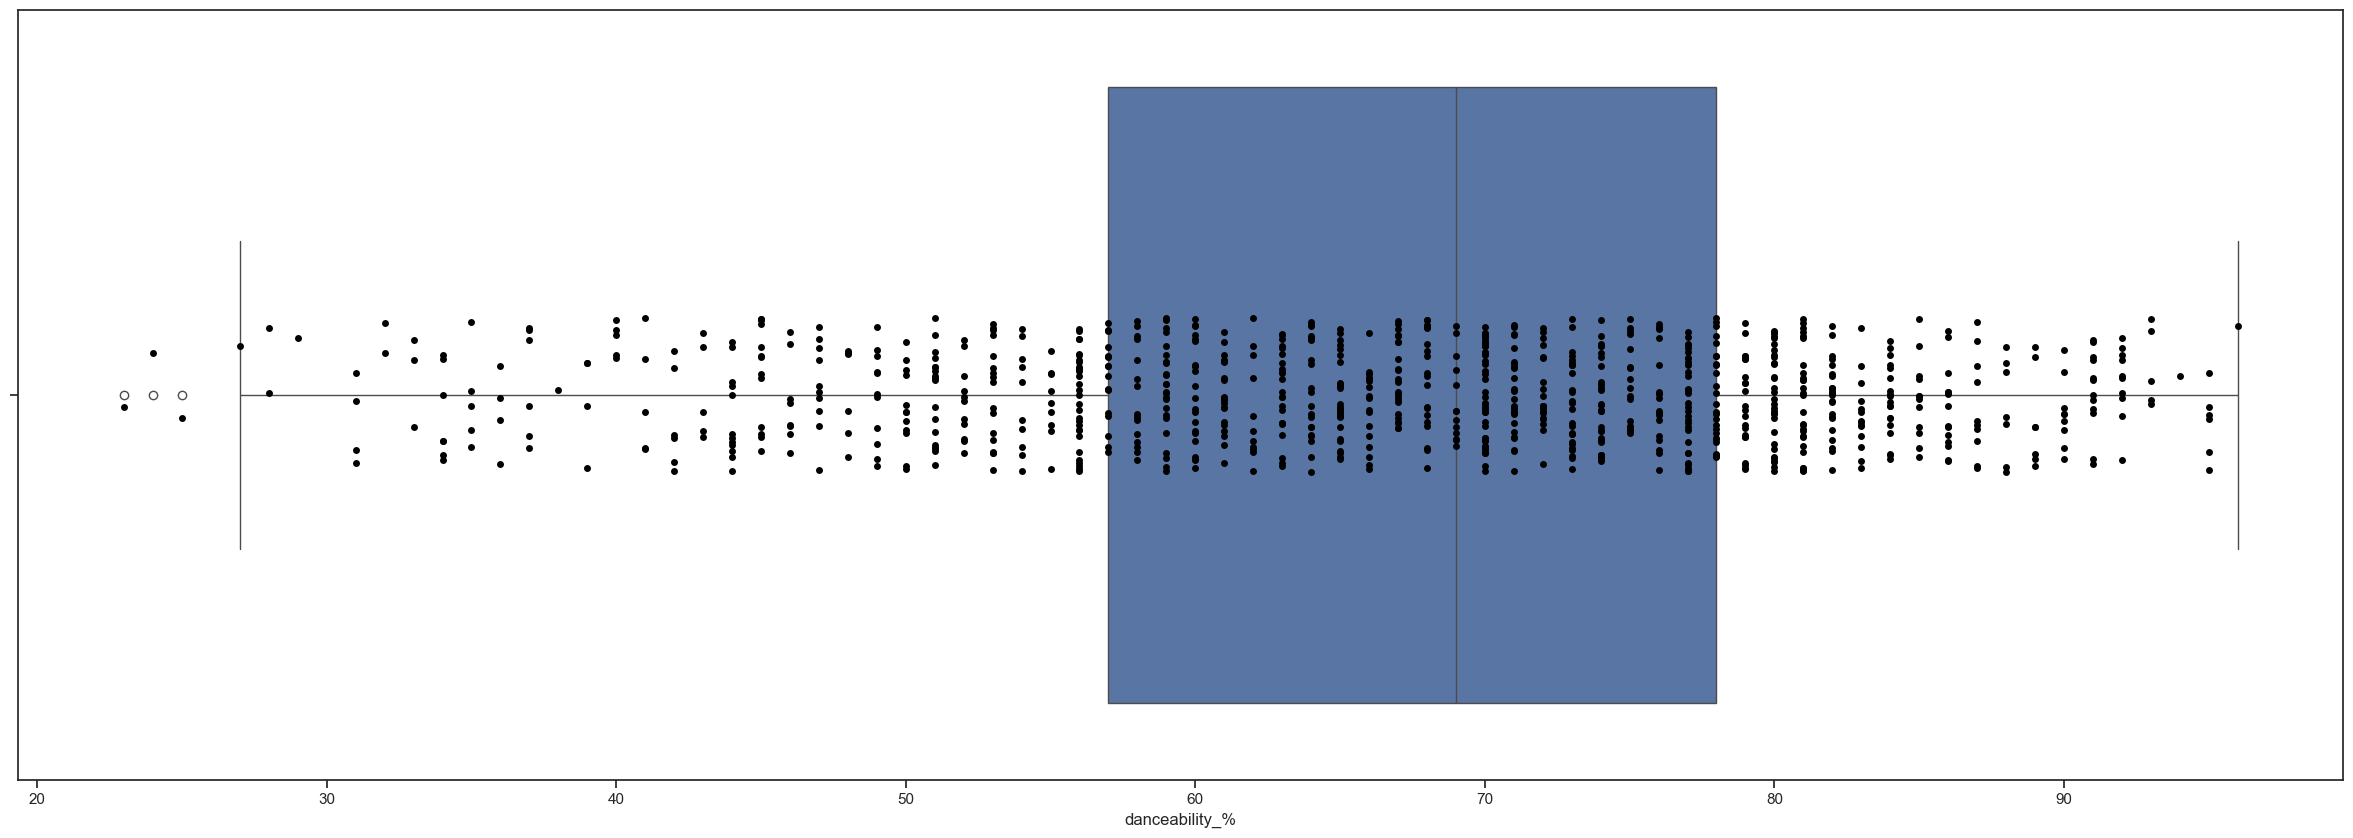

In [25]:
# danceability
sns.set(
        style="ticks",                  
        rc={"figure.figsize": (30, 10),    
            "figure.facecolor": "white",  
            "axes.facecolor": "white"})

b = sns.boxplot(data = df, x = df['danceability_%'])
b = sns.stripplot(data = df, x = df['danceability_%'], 
                      color = "black")
# Show the plot
b.get_figure();

b.figure.savefig("danceability_%", dpi=200)
print("mode: ", df['danceability_%'].mode())
df['danceability_%'].describe()


mode for valence:  0    24
Name: valence_%, dtype: int64


count    953.000000
mean      51.431270
std       23.480632
min        4.000000
25%       32.000000
50%       51.000000
75%       70.000000
max       97.000000
Name: valence_%, dtype: float64

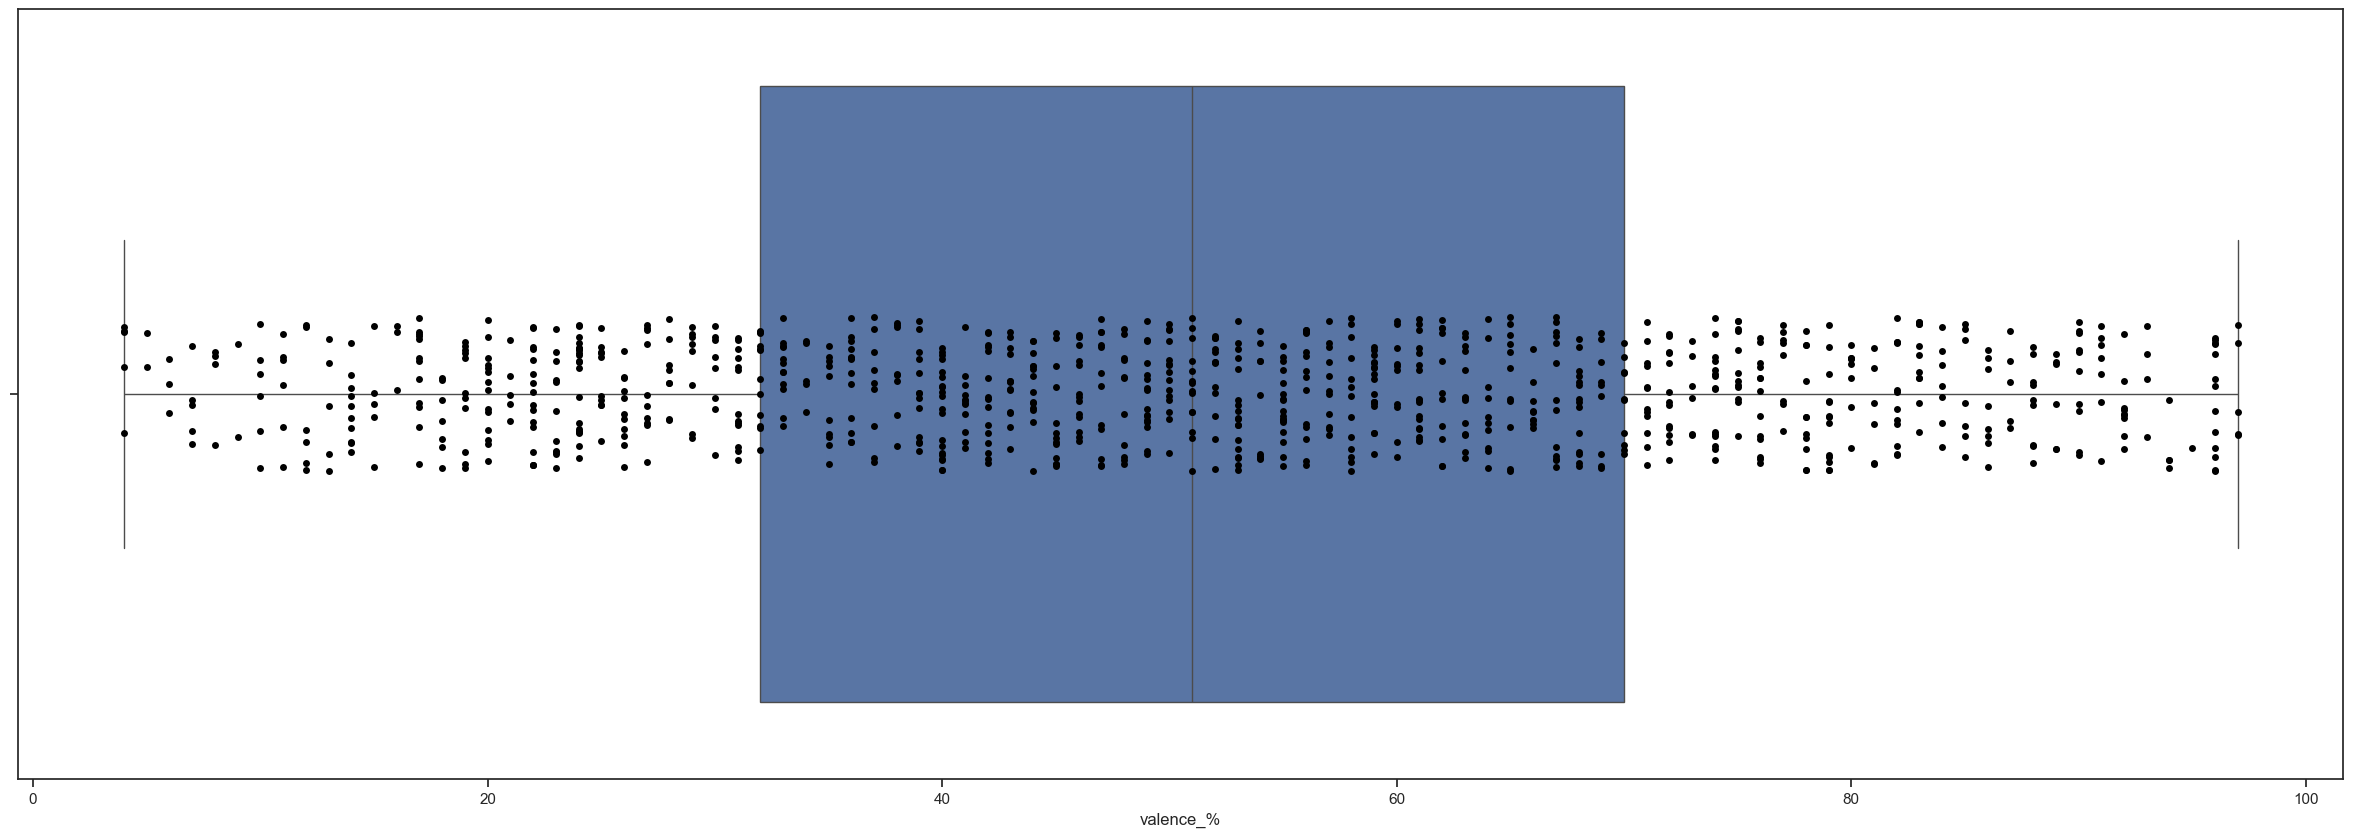

In [26]:
## valence
sns.set(
    style="ticks",
    rc={"figure.figsize": (30, 10),  
        "figure.facecolor": "white",  
        "axes.facecolor": "white"})


b = sns.boxplot(data=df, x=df['valence_%'])
b = sns.stripplot(data=df, x=df['valence_%'], color="black")
b.get_figure().savefig("valence_%", dpi=200)
print("mode for valence: ", df['valence_%'].mode())
df['valence_%'].describe()



mode for energy:  0    74
Name: energy_%, dtype: int64


count    953.000000
mean      64.279119
std       16.550526
min        9.000000
25%       53.000000
50%       66.000000
75%       77.000000
max       97.000000
Name: energy_%, dtype: float64

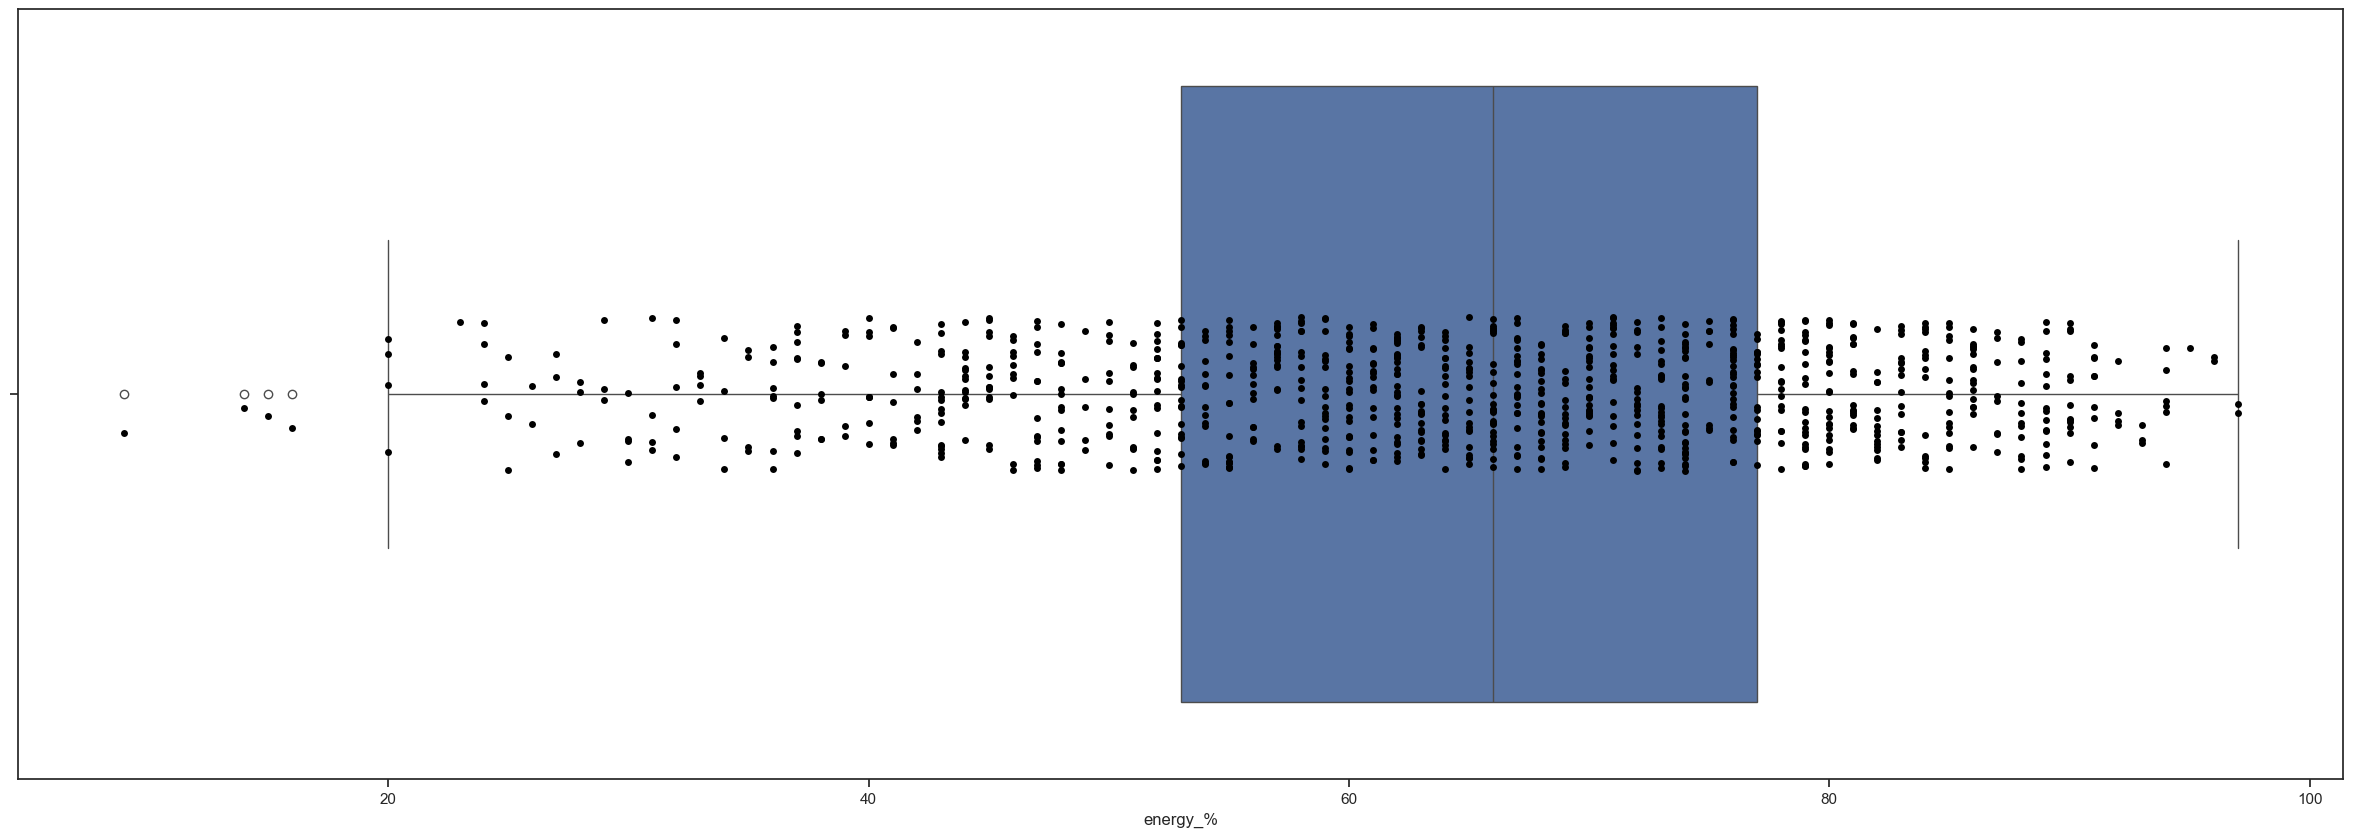

In [27]:
# energy
b = sns.boxplot(data=df, x=df['energy_%'])
b = sns.stripplot(data=df, x=df['energy_%'], color="black")
b.get_figure().savefig("energy_%", dpi=200)
print("mode for energy: ", df['energy_%'].mode())

df['energy_%'].describe()

mode for acousticness:  0    0
Name: acousticness_%, dtype: int64


count    953.000000
mean      27.057712
std       25.996077
min        0.000000
25%        6.000000
50%       18.000000
75%       43.000000
max       97.000000
Name: acousticness_%, dtype: float64

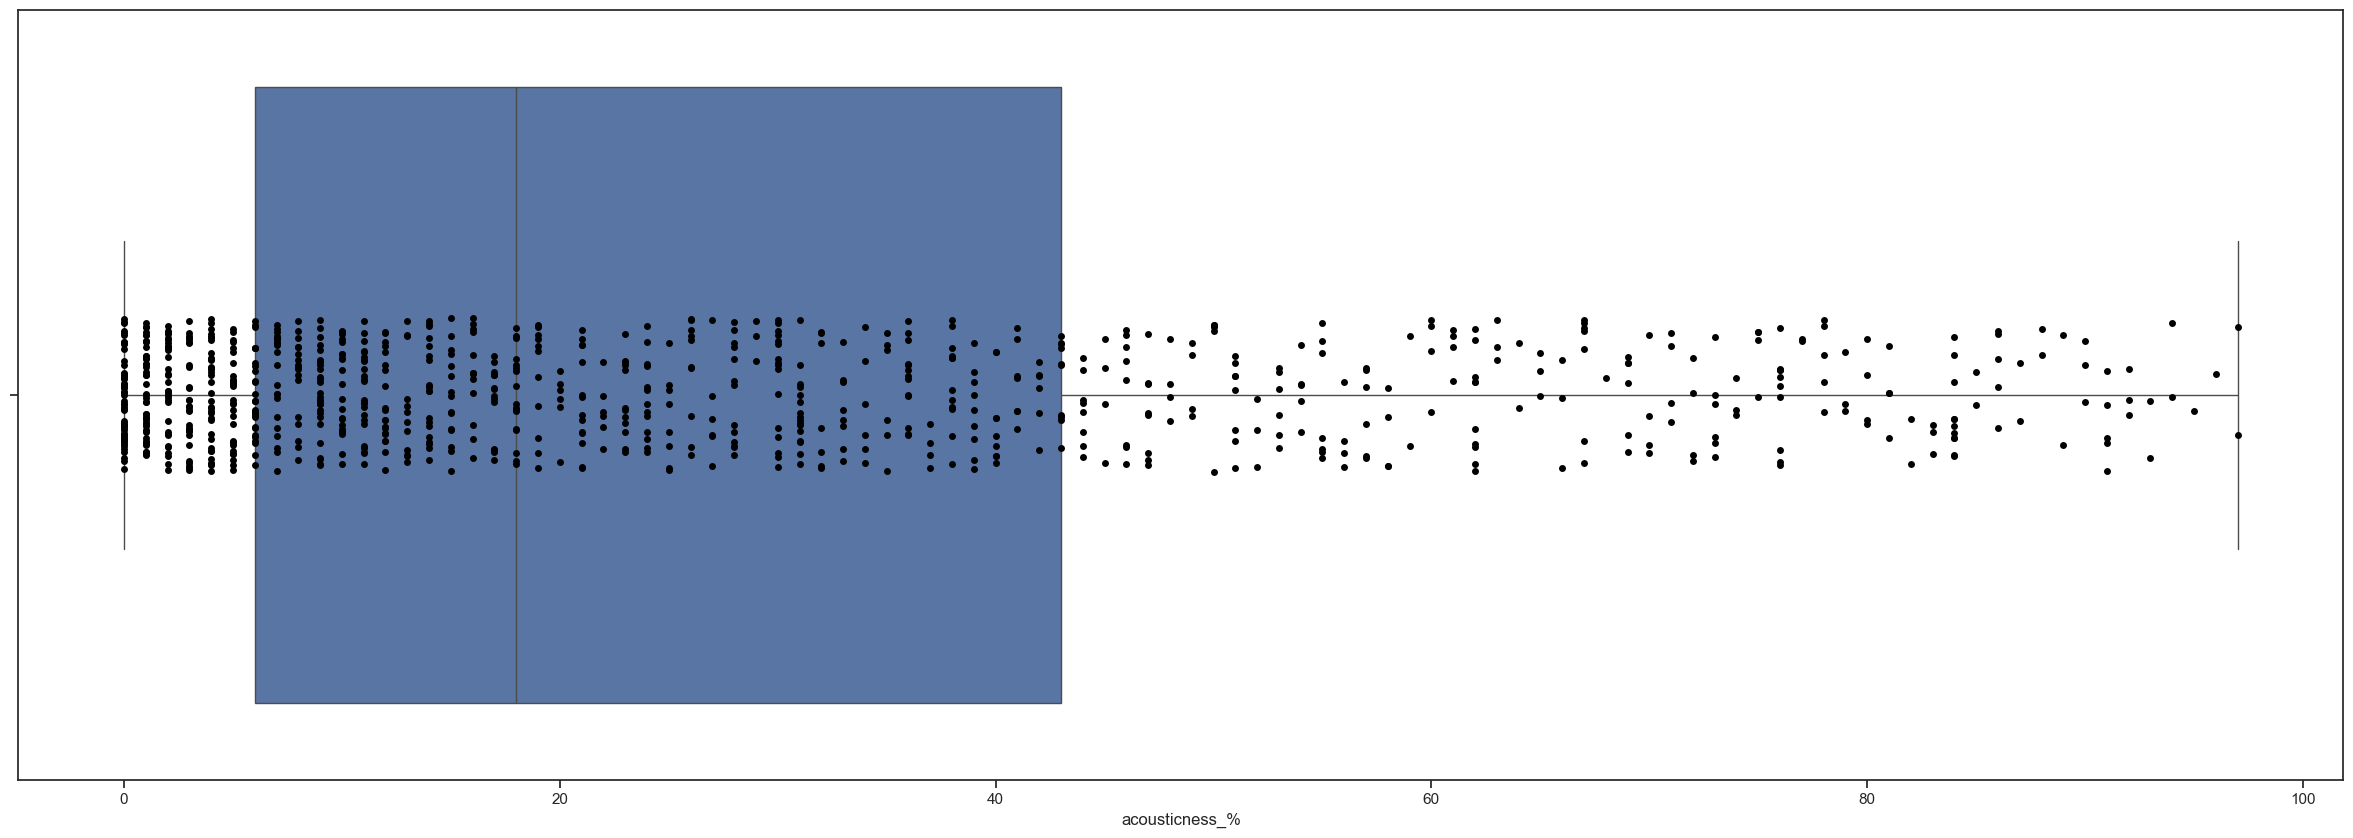

In [28]:
# acousticness
b = sns.boxplot(data=df, x=df['acousticness_%'])
b = sns.stripplot(data=df, x=df['acousticness_%'], color="black")
b.get_figure().savefig("acousticness_%", dpi=200)
print("mode for acousticness: ", df['acousticness_%'].mode())

df['acousticness_%'].describe()

mode for liveness:  0    11
Name: liveness_%, dtype: int64


count    953.000000
mean      18.213012
std       13.711223
min        3.000000
25%       10.000000
50%       12.000000
75%       24.000000
max       97.000000
Name: liveness_%, dtype: float64

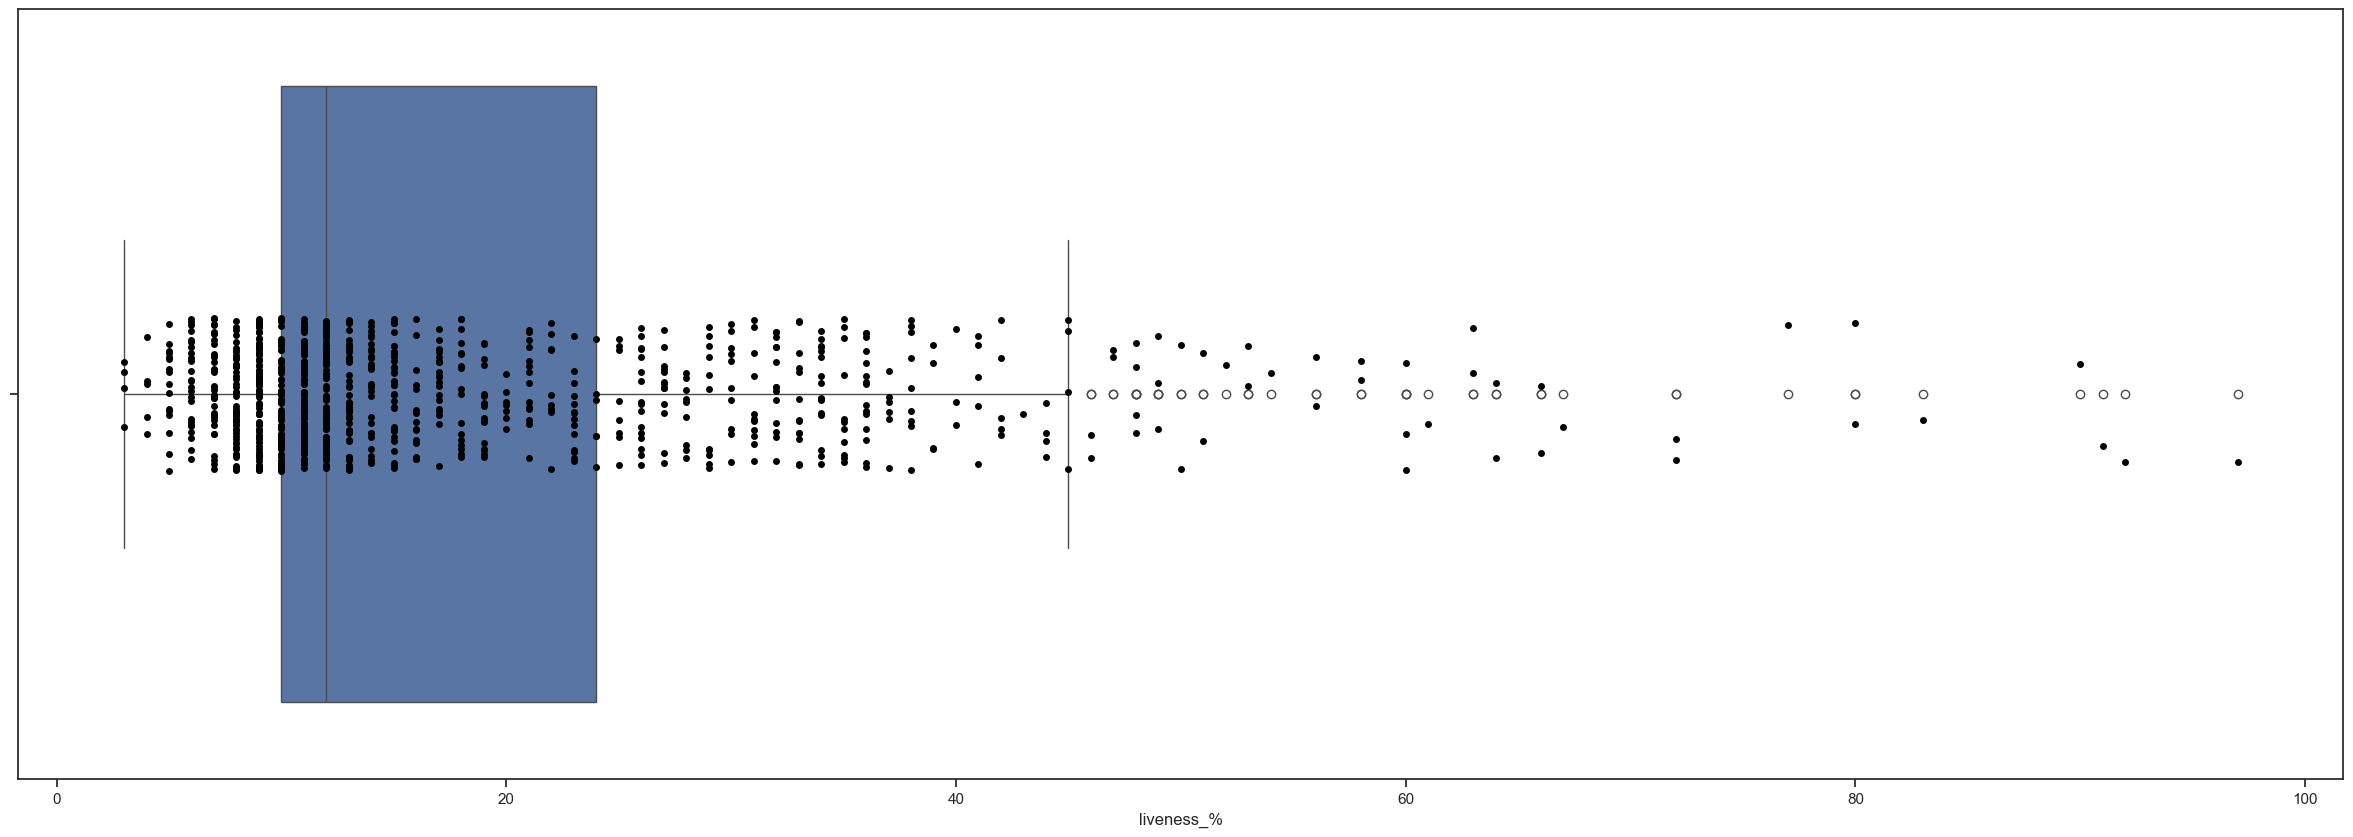

In [29]:
# liveness
b = sns.boxplot(data=df, x=df['liveness_%'])
b = sns.stripplot(data=df, x=df['liveness_%'], color="black")
b.get_figure().savefig("liveness_%", dpi=200)
print("mode for liveness: ", df['liveness_%'].mode())

df['liveness_%'].describe()

mode for speechiness:  0    4
Name: speechiness_%, dtype: int64


count    953.000000
mean      10.131165
std        9.912888
min        2.000000
25%        4.000000
50%        6.000000
75%       11.000000
max       64.000000
Name: speechiness_%, dtype: float64

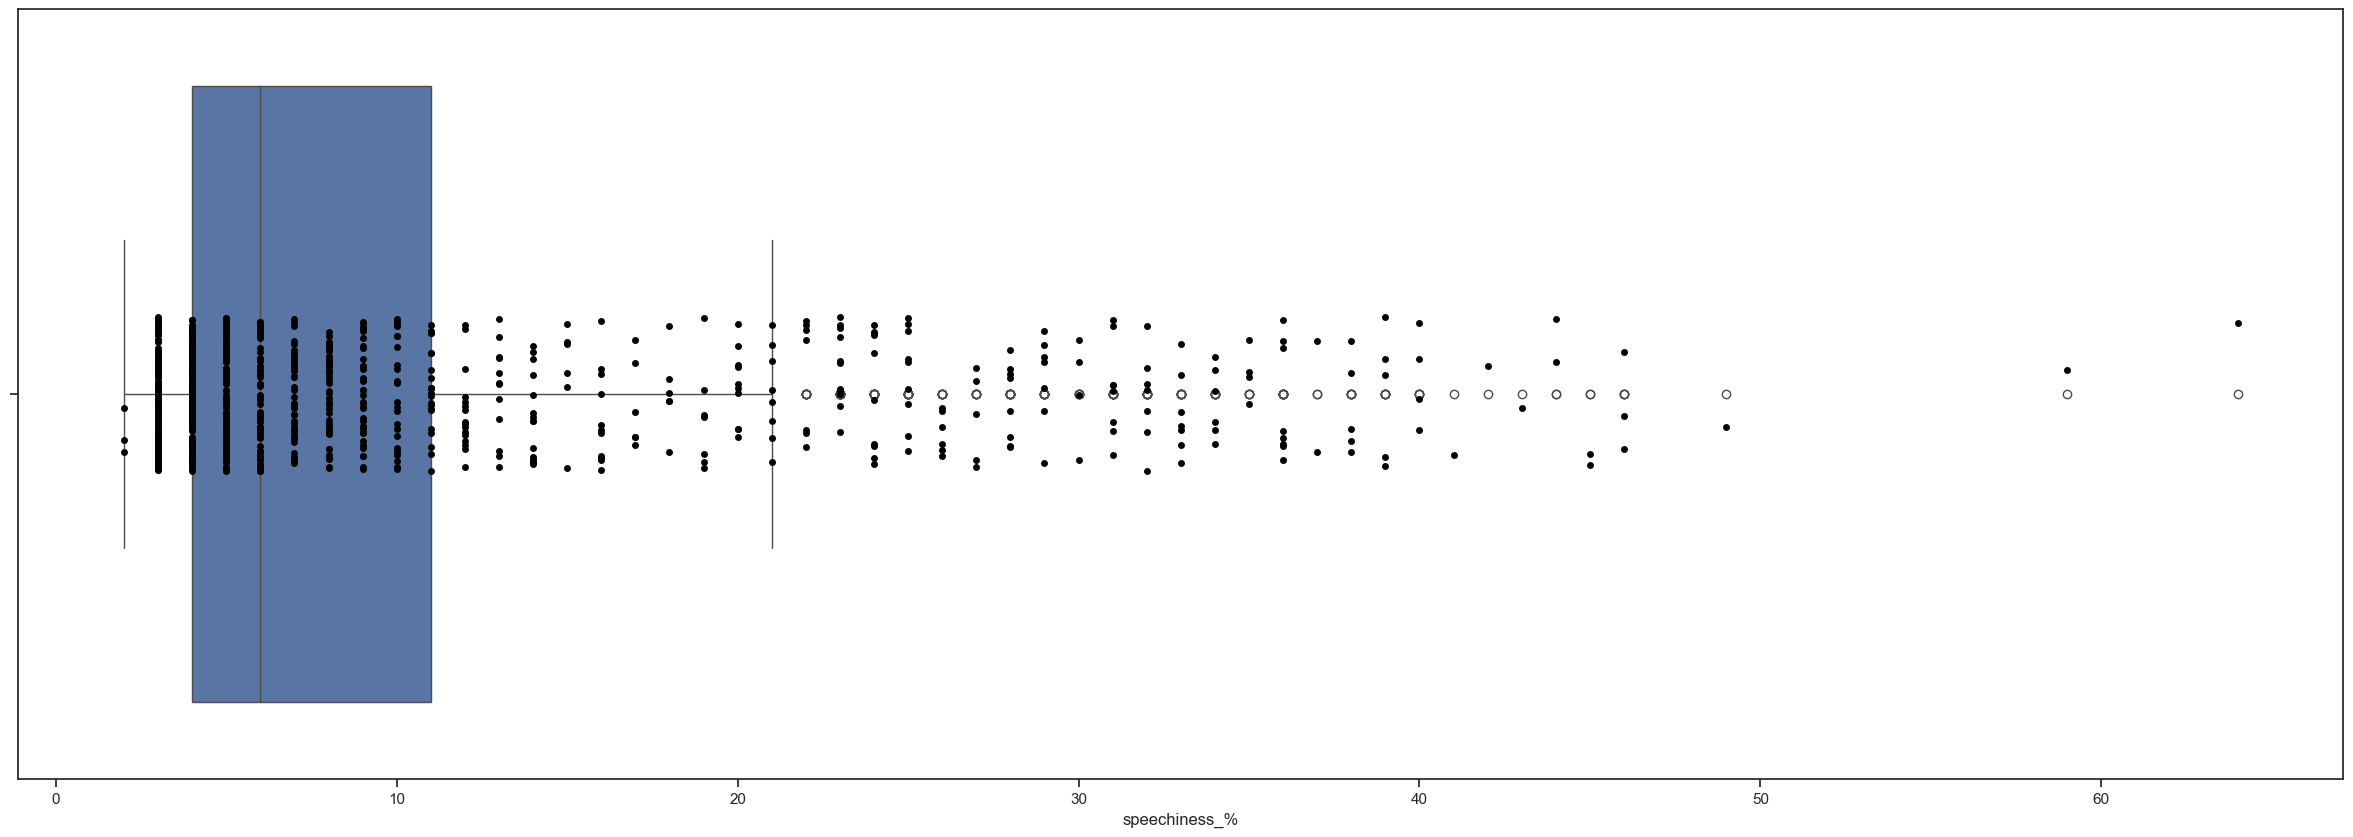

In [30]:
# speechiness
b = sns.boxplot(data=df, x=df['speechiness_%'])
b = sns.stripplot(data=df, x=df['speechiness_%'], color="black")
b.get_figure().savefig("speechiness_%", dpi=200)
print("mode for speechiness: ", df['speechiness_%'].mode())

df['speechiness_%'].describe()